# Econometrics Week 6 Time Series Assignment

| Name | Description | Date 
| :- |-------------: | :-:
|Thijs Meijerink| Econometrics| 23th of December 2022 |


## Questions
<ul>
<li><a href="#prep">Preparation</a></li>
<li><a href="#a">a</a></li>
<li><a href="#bI">b I</a></li>
<li><a href="#bII">b II</a></li>
<li><a href="#c">c</a></li>
<li><a href="#d">d</a></li>
<li><a href="#e">e</a></li>
<li><a href="#f">f</a></li>
</ul>


<a id='prep'></a>
## Preparation

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.ar_model import AutoReg

In [2]:
file_location="./TestExer6-CARS-round2.xlsx"
TestExer = pd.read_excel(file_location)
TestExer.head() # sample data

,YYYY-MM,TOYOTA,OTHER,TOYOTA_SA,OTHER_SA
0,1980M01,175734,315111,200015.142857,352054.297619
1,1980M02,200479,377893,198443.190476,363393.202381
2,1980M03,200373,385236,168488.047619,329570.059524
3,1980M04,211636,404110,210572.714286,416496.773810
4,1980M05,208527,371930,217037.190476,411574.059524


<a id='a'></a>
## a
Make time series plots of the variables yt and xt , and also of the share of Toyota in all produced passenger
cars, that is yt / (yt + xt ). What conclusions do you draw from these plots?

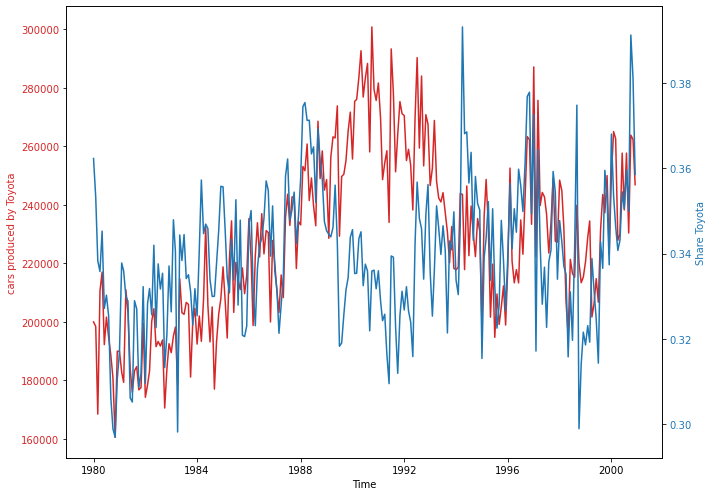

In [3]:
#make YYYY-MM to actual date
TestExer['date']=(TestExer['YYYY-MM'].astype(str).str[5:])+'-01-'+(TestExer['YYYY-MM'].astype(str).str[:4])
TestExer['date']=pd.to_datetime(TestExer['date'])


#Rename variables
yt=TestExer['TOYOTA_SA']
xt=TestExer['OTHER_SA']
X=TestExer['date']

#Create share
shareyt=yt/(yt+xt)


#Create graph
fig, ax1 = plt.subplots(figsize=(10,7))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('cars produced by Toyota', color=color)
ax1.plot(X, yt, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Share Toyota', color=color)  # we already handled the x-label with ax1
ax2.plot(X, shareyt, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped


plt.show()

#### Answer:
Generally Toyota car production follows the share quite closely, which indicates a stable share.There is, however, a short time period (1989-1993) where the production is high but the share is low.

<a id='bI'></a>
## b I
Perform the Augmented Dickey-Fuller (ADF) test for yt . In the ADF test equation, include a constant
(α) and three lags of ∆yt , as well as the variable of interest, yt-1. Report the coefficient of yt-1 and its
standard error and t-value, and draw your conclusion.

In [4]:
#perform augmented Dickey-Fuller test
result = adfuller(yt,maxlag=3, autolag=None)
fiveper=result[4].get('5%')
print(f'ADF t-stat: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
print(f'5% crit value: {fiveper}')

ADF t-stat: -2.214412114549921
n_lags: 3
p-value: 0.20105633439213288
5% crit value: -2.8732659015936024


#### Answer:
t-stat > 5% critical value, thus H0 cannot be rejected. Thus yt is not stationary

<a id='bII'></a>
## b II
Perform a similar ADF test for xt .

In [5]:
#perform augmented Dickey-Fuller test
result = adfuller(xt,maxlag=3, autolag=None)
fiveper=result[4].get('5%')
print(f'ADF t-stat: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
print(f'5% crit value: {fiveper}')

ADF t-stat: -2.185293036109841
n_lags: 3
p-value: 0.2116264704720479
5% crit value: -2.8732659015936024


#### Answer:
t-stat > 5% critical value, thus H0 cannot be rejected. Thus yt is not stationary

<a id='c'></a>
## c
Perform the two-step Engle-Granger test for cointegration of the time series yt and xt. In step 1, regress yt
on a constant and xt. In step 2, perform a regression of the residuals et in the model below. What is your conclusion?

<img src="week6c.png" alt="Alternative text" />


In [6]:
egtest = coint(yt, xt, trend='ct', method='aeg', autolag='AIC')
print(f'EG t-stat: {egtest[0]}')
print(f'p-value: {egtest[1]}')
print(f'5% crit value: {egtest[2][1]}')

EG t-stat: -4.485792680867692
p-value: 0.0058907056477461505
5% crit value: -3.8186524844050096


t-stat < 5% critical value, thus H0 should be rejected. Thus there is no cointegration between yt and xt

<a id='d'></a>
## d
Construct the first twelve sample autocorrelations and sample partial autocorrelations of ∆yt and use the
outcomes to motivate an AR(12) model for ∆yt . Check that only the lagged terms at lags 1 to 5, 10, and
12 are significant, and estimate the following model:

<img src="week6d.png" alt="Alternative text" />

In [7]:
#calculate deltas
#TestExer.set_index('date', inplace=True)
mask = (TestExer['date'] > '1980-1-1') & (TestExer['date'] <= '2000-1-1')
subset=TestExer.loc[mask]

deltaxt2=subset[['date','TOYOTA_SA']].diff()['TOYOTA_SA'].dropna()

In [8]:
#Get autocorrelation and partial autocorrelation lag results
print(acf(deltaxt2,nlags=12))
print(pacf(deltaxt2,nlags=12))

[ 1.         -0.46177472 -0.03563634  0.10470679 -0.09461952 -0.02861308
  0.11444293 -0.1843074   0.18427148  0.07723913 -0.34226685  0.16129413
  0.20912236]
[ 1.         -0.46371495 -0.31971812 -0.09111695 -0.12018493 -0.15846299
 -0.00279424 -0.19361539  0.02589879  0.21185357 -0.22826856 -0.19625088
  0.22923825]


Only few are significant using standard threshold of 0.05. However 0.13 is significant due to the amount of n. Therefore 12 lags can be used for next steps.

In [21]:
# train autoregression
model = AutoReg(deltaxt2.values, lags=12)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


Coefficients: [ 6.87294243e+02 -6.19812507e-01 -2.97311897e-01 -2.48401433e-01
 -2.52060040e-01 -2.10792113e-01 -1.09401638e-01 -1.21732421e-01
  4.66489978e-02  2.63326378e-02 -2.67922294e-01 -4.02259391e-02
  2.24921098e-01]


Now it shows that L1-L5 is p<5% (0.13), and L10 and L12 as well. The model is therefore as follow:

In [20]:
# train autoregression with only significant lags
model = AutoReg(deltaxt2.values, lags=[1,2,3,4,5,10,12])
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 6.19730503e+02 -6.05041485e-01 -2.62593108e-01 -2.22078014e-01
 -2.18068600e-01 -1.40239988e-01 -2.68726354e-01  2.48930780e-01]


<a id='e'></a>
## e
Extend the model of part (d) by adding the Error Correcion (EC) term (yt - 0.45xt ), that is, estimate the ECM:

<img src="week6e.png" alt="Alternative text" />

Check that the EC term is significant at the 5% level, but not at the 1% level.

In [ ]:
# I was unable to answer this question

<a id='f'></a>
## f
Use the models of parts (d) and (e) to make two series of 12 forecasts of monthly changes in production of
Toyota passenger cars in 2000. At each month, you should use the data that are then available, for example,
to forecast production for September 2000 you can use the data up to and including August 2000. However,
do not re-estimate the model and use the coefficients as obtained in parts (d) and (e). For each of the two
forecast series, compute the values of the root mean squared error (RMSE) and of the mean absolute error
(MAE). Finally, give your interpretation of the outcomes.

In [ ]:
# I was unable to answer this question